<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Hypothesis__testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hypothesis Tests
* One of the purposes of hypotheis testing id to determone whether a sample statistic is close to or far away from a hypothesized value.
* z-score=(sample_stat-hypothesized_value)/std.error
* z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic
* A hypothesis is a statement about an unknown population parameter.
  * Null hypothesis, the existing status quo. H0
  * Alternative hypotesis, the challeger HA
* Hypothesis tests check whether the **sample statistic** lies in the tails of the null distribution
* p-value represents the probability of obtaining a result under the null hypothesis


In [1]:
import pandas as pd
from scipy.stats import norm
import numpy as np

In [2]:
late=pd.read_feather('https://assets.datacamp.com/production/repositories/5982/datasets/887ec4bc2bcfd4195e7d3ad113168555f36d3afa/late_shipments.feather')

In [3]:
late.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


State the hypothesis.
1. H0 : The number of late shipments is 6%
2. HA : The number of late shipments exceeds 6%

</p> We use the boot strap method to determine the std_error for the test statistic. This can be done for any test statistic. We then calculate the z_score and the p_value from the z_score.</p>

In [4]:
# Calculate the sample statistic
sample_stat=(late.late=='Yes').mean()
sample_stat

0.061

In [5]:
# now create a boot strap distribution
late_prop=np.empty(1000)
for i in range(1000):
  boot=late.sample(frac=1,replace=True)
  stat=(boot.late=='Yes').mean()
  late_prop[i]=stat


In [ ]:
std_error=late_prop.std(ddof=1)
std_error

0.007550550629908711

In [ ]:
# Calculate the z score
z_score=(sample_stat-0.06)/std_error

In [ ]:
# Calculate the p-value
1-norm.cdf(z_score)

0.447317873165203

* large P-value means we fail to reject the null hypothesis.



---

2 types of error

---
1. Chosen H0, Actual HA then false negative (type 2 error)
2. Chosen HA, Actual H0 then false positive (type I error)



## Hypothesis test using t stat and bootstrap
* Using a t-statistic can be computationally less intensive and give similar results as doing a boot straping for the hypothesis test.
* We want to test whether heavier packages are late and if this is statistically significant.



* H0-: No diff in mean weight between packages that are late and on time
* HA-: Packages that are late are heavier
* Alpha-: 0.05


In [6]:
# First lets see if there is a difference in weight for late packages
means=late.groupby('late')['weight_kilograms'].mean()


In [7]:
# Calculating the test statistic
test_statistic=means[1]-means[0]

In [8]:
# Performing bootstrap to calculate std error
rep=np.empty(1000)
for i in range(1000):
  samp=late.sample(frac=1,replace=True)
  means=samp.groupby('late')['weight_kilograms'].mean()
  rep[i]=means[1]-means[0]

In [9]:
std_error=np.std(rep)

In [10]:
z_score=(test_statistic-0)/std_error
z_score

2.3313534196293575

In [19]:
from scipy.stats import norm
p_val=1-norm.cdf(z_score,loc=0,scale=1)
p_val

0.009867365780278137

In [20]:
alpha=0.05
p_val<=alpha

True

* In this case the p value is less than the alpha so we reject the null hypothesis
* In other words late packages tend to be heavier packages

### Use t-statistic for the same result

In [11]:
count=late.late.value_counts()

In [12]:
n_yes=late.loc[late.late=='Yes','id'].count()
n_no=late.loc[late.late=='No','id'].count()
print(n_yes,n_no)

61 939


In [13]:
std_yes=late.loc[late.late=='Yes','weight_kilograms'].std()
std_no=late.loc[late.late=='No','weight_kilograms'].std()
print(std_yes,std_no)

2544.688210903328 3154.0395070841696


In [14]:
denominator=np.sqrt((std_yes**2/n_yes)+(std_no**2/n_no))
denominator

341.68543274794337

In [15]:
tstat=test_statistic/denominator
tstat

2.3936661778766433

In [16]:
from scipy.stats import t
pval=1-t.cdf(tstat,df=n_yes+n_no-2)

In [21]:
pval<=alpha

True

In [22]:
pval

0.008432382146249529

#### Running a similar test for salary
* H0: Difference in salaries is 0
* HA: the salroes of folks who started as kids are higher

In [23]:
stack=pd.read_feather('https://assets.datacamp.com/production/repositories/5982/datasets/c59033b93930652f402e30db77c3b8ef713dd701/stack_overflow.feather')

In [24]:
stack.sample(5)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
1158,26933.0,I am a developer by profession,Yes,31.0,11.0,child,Yearly,60000.0,64859.0,Germany,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",React.js,Angular;Flask;jQuery;React.js;Vue.js,Just as welcome now as I felt last year,NaN,15.0,6.0,At least 30
1110,25708.0,I am a developer by profession,Yes,36.0,5.0,child,Monthly,2000.0,24000.0,Ukraine,...,Too long,No,"Computer science, computer engineering, or sof...",Drupal;Laravel;Vue.js,Drupal;jQuery;Laravel;Vue.js,Just as welcome now as I felt last year,NaN,30.0,15.0,At least 30
1832,49988.0,I am a developer by profession,No,30.0,14.0,adult,Yearly,50000.0,54049.0,Italy,...,Appropriate in length,No,Mathematics or statistics,Django;Flask,None,A lot more welcome now than last year,45.0,16.0,5.0,Under 30
1850,50482.0,I am a developer by profession,Yes,21.0,11.0,child,Monthly,35000.0,17124.0,Ukraine,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,40.0,10.0,1.0,Under 30
1677,46641.0,"I am not primarily a developer, but I write co...",No,32.0,17.0,adult,Yearly,50000.0,33405.0,Australia,...,Too long,No,None,None,None,Just as welcome now as I felt last year,20.0,15.0,10.0,At least 30


In [25]:
# Getting the mean salary by child_begin and adult begin coders
means=stack.groupby('age_first_code_cut')['converted_comp'].mean()

In [26]:
test_stat=means[1]-means[0]

In [27]:
counts=stack.groupby('age_first_code_cut')['converted_comp'].count()

In [28]:
n_adult=counts[0]
n_child=counts[1]

In [29]:
std=stack.groupby('age_first_code_cut')['converted_comp'].std()

In [30]:
std_a=std[0]
std_c=std[1]

In [31]:
denominator=np.sqrt(std_a**2/n_adult+std_c**2/n_child)

In [32]:
t_stat=test_stat/denominator
t_stat

1.8699313316221844

In [33]:
1-t.cdf(t_stat,df=n_adult+n_child-2)

0.030811302165157595

## ANOVA
* Typically used when you have to compare the means across multiple categories.
* Is the mean salary different by different levels of job satisfaction. It would be comparing mean salaries across multiple categories.
* Generally use pigouin package for this

In [38]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 48.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196208 sha256=6abeaefc0884cc24970c592b5e1ceb3a30becfe3ce84dcc6ef5de3eb6a5b7420
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7049 sha256=32f5571a7068513816452f6bf7e7ced7ece7d06e21f7f281890e12402df039d4
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [39]:
import pingouin

In [34]:
stack.groupby('job_sat')['converted_comp'].mean()

job_sat
Very dissatisfied        127539.679245
Slightly dissatisfied     96643.324561
Neither                  110593.980100
Slightly satisfied        96084.992647
Very satisfied           147281.484642
Name: converted_comp, dtype: float64

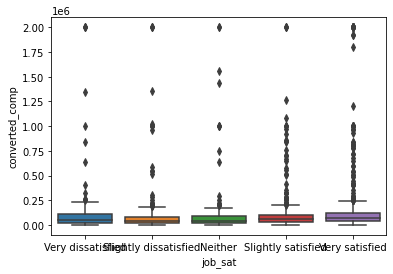

In [40]:
import seaborn as sns
sns.boxplot(x='job_sat',y='converted_comp',data=stack)


In [41]:
pingouin.anova(data=stack,dv='converted_comp',between='job_sat')

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


> Both the boxplot and the anova test show that there is some relationship between *job satisfaction* and *compensation.* The p_value *p-unc* shows that at a 95% CI level we can say that job satisfaction affects compensation. From the box plot it is the Very satisfied category driving this difference

In [42]:
pingouin.pairwise_tests(data=stack,dv='converted_comp',between='job_sat',padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


> Looks like Slightly satisfied and Very satisfied have a statistically significant relationship and so do Very satisfied and Slightly dissatisfied.  All other pairwise relation ships are not statistically significant

## One sample proportion test
* Unknown population proportion is equal to some value. Could be achieved through bootstrapping. eg H0: Proportion of late apckages is 6% or less
HA: Proportion of late packages is greater than 6%. 
* The standard error of the test stastic can also be determined using the formula
$\sqrt{\frac{p0*(1-p0)}{n}}$

## Chisquare test of independence
* This can be used as a test to see if 2 categorical variables are dependent/independent on each other.
* Are job satisfaction and age category related.
* H0: Job Satisfaction and age category are not related
* HA: Job satisfaction and age category are related

In [48]:
data_prop=stack.groupby('job_sat')['age_cat'].value_counts(normalize=True)

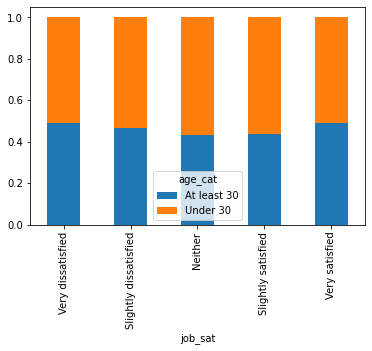

In [50]:
data_prop.unstack().plot(kind='bar',stacked=True)

In [51]:
expected,observed,stats=pingouin.chi2_independence(x='job_sat',y='age_cat',data=stack)

In [52]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419
